In [1]:
import pandas as pd

In [2]:
tokens = pd.read_csv('tokens_with_gram_and_dist.csv', encoding='cp1251')
tokens = tokens.drop('Unnamed: 0', 1)
tokens.head()

,doc_id,shift_o,length_o,token,lemma,gram,ID,variant,group_id,chain_id,...,content,tk_shifts,attributes,head,hd_shifts,anaph,PoS,count,dist_to_ant,gend
0,1,0,2,Во,во,Sp-a,1-0,-,-,-,...,-,-,-,-,-,-,S,NaN,NaN,NaN
1,1,3,5,время,время,Ncnsan,1-3,-,-,-,...,-,-,-,-,-,-,N,n,NaN,NaN
2,1,9,5,своих,свой,P---pga,1-9,1.0,407840.0,1070.0,...,своих,9,ref:def|str:refl|type:coref,-,-,0.0,P,p,NaN,NaN
3,1,15,8,прогулок,прогулка,Ncfpgn,1-15,-,-,-,...,-,-,-,-,-,-,N,f,NaN,NaN
4,1,24,1,в,в,Sp-l,1-24,-,-,-,...,-,-,-,-,-,-,S,NaN,NaN,NaN


In [3]:
import gensim
from tqdm import tqdm_notebook as tqdm
import numpy as np
model = gensim.models.KeyedVectors.load_word2vec_format('./ruwikiruscorpora_0_300_20.bin', binary=True)

In [4]:
tokens['vec'] = ['']*len(tokens)
pos_tags = {'V':'_VERB','A':'_ADJ','N':'_NOUN','R':'_ADV','Q':'_PART','P':'_PRON','I':'_INTJ', 'C':'_CCONJ', 'M':'ADV', 'S':'', ',':'', '-':''}
#c = 0
tokens['vec'] = tokens['vec'].astype('object')
for token_id, token in tqdm(tokens.iterrows()):
    #c += 1
    tag = token['lemma']+pos_tags[token['PoS']]
    if tag in model.vocab.keys():
        #print(model[tag])
        tokens.set_value(token_id, 'vec', model[tag])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [41]:
from string import punctuation

def mean_vec(vectors, i, count):
    res = []
    for c in range(i, count):
        if len(vectors[c]) > 1:
            res.append(vectors[c])
    return np.matrix(res).mean(0).tolist()

def get_disc_vecs(tokens, window):
    tokens_no_punct = tokens.loc[[token not in punctuation for token in tokens['lemma']]].reset_index()
    tokens_no_punct = tokens_no_punct.drop('index', 1)
    result = []
    for name, group in tqdm(tokens_no_punct.groupby('doc_id')['vec']):
        for_doc = []
        g = group.index[0]
        for i in range(len(group)-window):
            if len(mean_vec(group.loc[i+g:i+g+window-1], i+g, window+i+g)[0])<300:
                print(name, g, group.index[-1], len(group), i+g, i+g+window-1, i+g, window+i+g, len(mean_vec(group.loc[i+g:i+g+window-1], i+g, window+i+g)[0]))
            else:
                for_doc.append(mean_vec(group.loc[i+g:i+g+window-1], i+g, window+i+g))
        result.append(for_doc)
    return result
        #
res_20 = get_disc_vecs(tokens, 20)
#res_10 = get_disc_vecs(tokens, 10)
#res_30 = get_disc_vecs(tokens, 30)

134 57847 60039 2193 58508 58527 58508 58528 0
134 57847 60039 2193 58509 58528 58509 58529 0
134 57847 60039 2193 58510 58529 58510 58530 0
134 57847 60039 2193 58511 58530 58511 58531 0
134 57847 60039 2193 58512 58531 58512 58532 0
134 57847 60039 2193 58513 58532 58513 58533 0
134 57847 60039 2193 58514 58533 58514 58534 0
323 108481 112453 3973 109823 109842 109823 109843 0
323 108481 112453 3973 109824 109843 109824 109844 0
323 108481 112453 3973 109825 109844 109825 109845 0
323 108481 112453 3973 109826 109845 109826 109846 0
323 108481 112453 3973 109827 109846 109827 109847 0
323 108481 112453 3973 109828 109847 109828 109848 0
323 108481 112453 3973 109829 109848 109829 109849 0



In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
import matplotlib.pyplot as plt
new_res_20 = []
succsess = []
for n, text in enumerate(res_20):
    n_res_20 = []
    for i in range(len(text)-1):
        succsess.append((len(text[i]),len(text[i+1]), n, i))
        n_res_20.append(cosine_similarity(text[i], text[i+1]))
    new_res_20.append(n_res_20)
del res_20
#print(new_res_20)

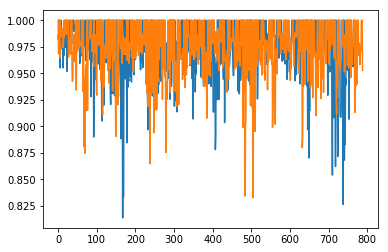

In [56]:
res_30 = get_disc_vecs(tokens, 30)
new_res_30 = []
succsess = []
for n, text in enumerate(res_20):
    n_res_30 = []
    for i in range(len(text)-1):
        succsess.append((len(text[i]),len(text[i+1]), n, i))
        n_res_30.append(cosine_similarity(text[i], text[i+1]))
    new_res_30.append(n_res_30)
del res_30
for r in tqdm(new_res_30[:2]):
    #print([ro[0][0] for ro in r])
    plt.plot(range(len(r)), [ro[0][0] for ro in r])
plt.show()

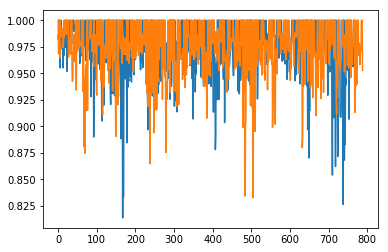

In [55]:
#print(len(new_res_20))
for r in tqdm(new_res_20[:2]):
    #print([ro[0][0] for ro in r])
    plt.plot(range(len(r)), [ro[0][0] for ro in r])
plt.show()